In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('vlrscrape1.3.csv')
df.head()

,Date,VS,Winner,Scoreline,Series Type,Map,Player,Agent,R,ACS,...,FK_all,FK_attack,FK_defend,FD_all,FD_attack,FD_defend,FKFD +/-_all,FKFD +/-_attack,FKFD +/-_defend,Team
0,2023-06-17 01:30:00,Paper Rex DRX,Paper Rex,2:0,BO3,All Maps,Jinggg,-,1.37 1.33 1.39,323 314 332,...,9,6,3,4,1,3,5,5,0,Paper Rex
1,2023-06-17 01:30:00,Paper Rex DRX,Paper Rex,2:0,BO3,All Maps,mindfreak,-,1.19 0.78 1.58,199 144 254,...,4,1,3,4,3,1,0,-2,2,Paper Rex
2,2023-06-17 01:30:00,Paper Rex DRX,Paper Rex,2:0,BO3,All Maps,d4v41,-,1.12 1.23 1.02,175 174 177,...,5,2,3,2,1,1,3,1,2,Paper Rex
3,2023-06-17 01:30:00,Paper Rex DRX,Paper Rex,2:0,BO3,All Maps,f0rsakeN,-,1.04 1.29 0.77,186 250 124,...,6,3,3,5,2,3,1,1,0,Paper Rex
4,2023-06-17 01:30:00,Paper Rex DRX,Paper Rex,2:0,BO3,All Maps,cgrs,-,0.86 0.82 0.89,145 128 162,...,4,2,2,3,2,1,1,0,1,Paper Rex


In [4]:
df.KAST_all = pd.to_numeric(df.KAST_all.str.replace('%', ''))
df.KAST_attack = pd.to_numeric(df.KAST_attack.str.replace('%', ''))
df.KAST_defend = pd.to_numeric(df.KAST_defend.str.replace('%', ''))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             480 non-null    object 
 1   VS               480 non-null    object 
 2   Winner           480 non-null    object 
 3   Scoreline        480 non-null    object 
 4   Series Type      480 non-null    object 
 5   Map              480 non-null    object 
 6   Player           480 non-null    object 
 7   Agent            480 non-null    object 
 8   R                480 non-null    object 
 9   ACS              480 non-null    object 
 10  K                480 non-null    object 
 11  D                480 non-null    object 
 12  A                480 non-null    object 
 13  KD +/-           480 non-null    object 
 14  KAST             480 non-null    object 
 15  ADR              480 non-null    object 
 16  HS%              480 non-null    object 
 17  FK              

In [6]:
df_finale = df[(df['Winner'] == 'FNATIC') & (df['Series Type'] == 'BO5')]
df_finale.head()

,Date,VS,Winner,Scoreline,Series Type,Map,Player,Agent,R,ACS,...,FK_all,FK_attack,FK_defend,FD_all,FD_attack,FD_defend,FKFD +/-_all,FKFD +/-_attack,FKFD +/-_defend,Team
230,2023-06-25 00:30:00,FNATIC Evil Geniuses,FNATIC,3:0,BO5,All Maps,Alfajer,-,1.31 1.18 1.48,246 254 235,...,7,3,4,2,2,0,5,1,4,FNATIC
231,2023-06-25 00:30:00,FNATIC Evil Geniuses,FNATIC,3:0,BO5,All Maps,Leo,-,1.29 1.24 1.36,200 208 183,...,2,0,2,0,0,0,2,0,2,FNATIC
232,2023-06-25 00:30:00,FNATIC Evil Geniuses,FNATIC,3:0,BO5,All Maps,Derke,-,1.11 1.05 1.17,267 264 276,...,16,9,7,22,13,9,-6,-4,-2,FNATIC
233,2023-06-25 00:30:00,FNATIC Evil Geniuses,FNATIC,3:0,BO5,All Maps,Chronicle,-,1.02 0.88 1.19,177 138 223,...,5,1,4,7,5,2,-2,-4,2,FNATIC
234,2023-06-25 00:30:00,FNATIC Evil Geniuses,FNATIC,3:0,BO5,All Maps,Boaster,-,0.99 0.93 1.04,153 136 169,...,3,1,2,7,3,4,-4,-2,-2,FNATIC


In [7]:
df_finale[(df_finale['Map'] == 'All Maps')][['Team', 'Player', 'ACS_all']]

,Team,Player,ACS_all
230,FNATIC,Alfajer,246
231,FNATIC,Leo,200
232,FNATIC,Derke,267
233,FNATIC,Chronicle,177
234,FNATIC,Boaster,153
235,Evil Geniuses,Ethan,193
236,Evil Geniuses,Demon1,199
237,Evil Geniuses,Boostio,189
238,Evil Geniuses,C0M,146
239,Evil Geniuses,jawgemo,173


In [8]:
df_finale_mean = df_finale.groupby('Team').mean(numeric_only=True)
df_finale_mean

,R_all,R_attack,R_defend,ACS_all,ACS_attack,ACS_defend,K_all,K_attack,K_defend,D_all,...,ADR_defend,FK_all,FK_attack,FK_defend,FD_all,FD_attack,FD_defend,FKFD +/-_all,FKFD +/-_attack,FKFD +/-_defend
Team,,,,,,,,,,,,,,,,,,,,,
Evil Geniuses,0.8980,0.7910,0.9860,180.0,172.35,186.75,21.7,9.8,11.9,25.3,...,123.35,3.8,1.5,2.3,3.3,1.9,1.4,0.5,-0.4,0.9
FNATIC,1.1425,1.0565,1.2485,208.6,200.10,218.55,25.3,12.6,12.7,21.7,...,136.35,3.3,1.4,1.9,3.8,2.3,1.5,-0.5,-0.9,0.4


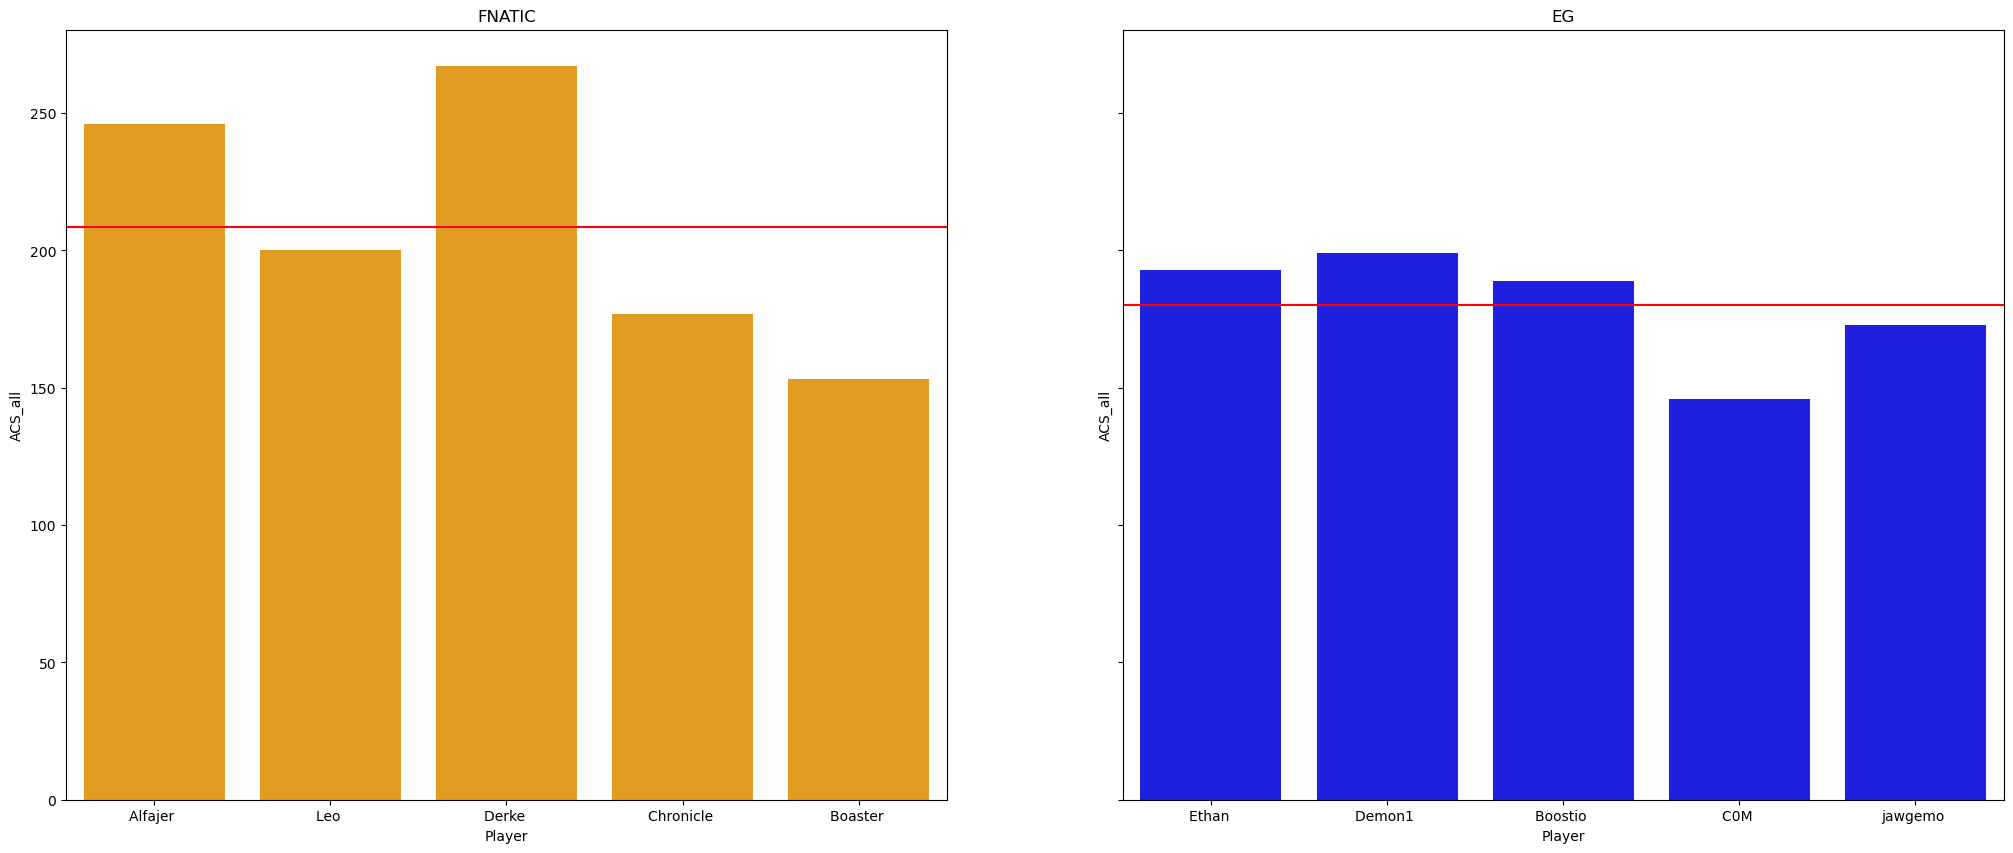

In [9]:
bar1_data = df_finale[(df_finale['Map'] == 'All Maps')][['Team', 'Player', 'ACS_all']]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,10), sharey=True)
sns.barplot(data=bar1_data[bar1_data['Team'] == 'FNATIC'], x='Player', y='ACS_all', ax=ax[0], color='Orange').set_title('FNATIC')
sns.barplot(data=bar1_data[bar1_data['Team'] == 'Evil Geniuses'], x='Player', y='ACS_all', ax=ax[1], color='Blue').set_title('EG')

ax[0].axhline(y=df_finale_mean.loc[('FNATIC'), 'ACS_all'], xmin=0, xmax=1, color='Red')
ax[1].axhline(y=df_finale_mean.loc[('Evil Geniuses'), 'ACS_all'], xmin=0, xmax=1, color='Red')

In [10]:
df_player = df.groupby(['Team','Player']).mean(numeric_only=True)
df_player.reset_index(inplace=True)
df_player.head()

,Team,Player,R_all,R_attack,R_defend,ACS_all,ACS_attack,ACS_defend,K_all,K_attack,...,ADR_defend,FK_all,FK_attack,FK_defend,FD_all,FD_attack,FD_defend,FKFD +/-_all,FKFD +/-_attack,FKFD +/-_defend
0,DRX,BuZz,0.820000,0.586667,1.060000,233.666667,226.000000,243.000000,23.333333,11.333333,...,163.000000,6.000000,5.333333,0.666667,6.666667,4.666667,2.000000,-0.666667,0.666667,-1.333333
1,DRX,MaKo,1.083333,1.256667,0.920000,217.666667,276.666667,159.333333,24.000000,16.000000,...,128.333333,0.666667,0.666667,0.000000,3.333333,1.333333,2.000000,-2.666667,-0.666667,-2.000000
2,DRX,Rb,0.943333,1.080000,0.826667,197.000000,249.666667,148.333333,23.333333,14.666667,...,92.000000,2.666667,0.000000,2.666667,3.333333,2.000000,1.333333,-0.666667,-2.000000,1.333333
3,DRX,Zest,0.856667,0.670000,1.070000,167.000000,102.000000,235.333333,19.333333,6.000000,...,136.000000,2.000000,0.000000,2.000000,2.666667,0.000000,2.666667,-0.666667,0.000000,-0.666667
4,DRX,stax,0.770000,0.783333,0.770000,119.666667,131.333333,108.333333,11.333333,6.000000,...,73.666667,0.666667,0.000000,0.666667,2.666667,1.333333,1.333333,-2.000000,-1.333333,-0.666667


In [11]:
df_player.describe()

,R_all,R_attack,R_defend,ACS_all,ACS_attack,ACS_defend,K_all,K_attack,K_defend,D_all,...,ADR_defend,FK_all,FK_attack,FK_defend,FD_all,FD_attack,FD_defend,FKFD +/-_all,FKFD +/-_attack,FKFD +/-_defend
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.981631,0.934734,1.027231,195.682511,192.872863,199.621970,21.185216,10.529297,10.655920,21.765346,...,129.732089,2.993528,1.313658,1.679870,3.187532,1.781656,1.405877,-0.194004,-0.467998,0.273994
std,0.138343,0.171819,0.182560,34.651327,43.525384,41.692394,4.133873,2.588288,2.432060,2.282176,...,26.447459,1.820365,1.267490,0.858736,1.551889,1.087099,0.738530,1.221776,0.679923,0.936955
min,0.643333,0.586667,0.578333,119.666667,102.000000,108.333333,10.666667,5.000000,5.333333,14.571429,...,73.666667,0.666667,0.000000,0.000000,0.285714,0.000000,0.000000,-2.666667,-2.000000,-2.000000
25%,0.904318,0.815000,0.885455,175.530682,163.056818,171.840909,19.318182,8.724026,8.666667,21.272727,...,116.663636,1.684091,0.534091,1.000000,2.347727,1.068182,0.964286,-1.090909,-0.931818,-0.363636
50%,0.990455,0.956396,1.047250,192.129545,193.000000,199.954545,22.000000,10.636364,11.045455,21.683333,...,132.795455,2.454545,0.909091,1.651515,2.950000,1.568182,1.454545,-0.190909,-0.522727,0.348485
75%,1.060125,1.027125,1.122045,214.414773,212.612500,228.545455,23.727273,12.182143,12.050000,22.500000,...,147.742424,4.025000,1.500000,2.211364,3.818182,2.000000,2.000000,0.551948,0.000000,1.100000
max,1.310714,1.383333,1.547143,268.181818,328.666667,277.727273,30.545455,16.000000,15.000000,26.666667,...,179.550000,8.181818,5.333333,3.636364,6.714286,4.666667,3.000000,2.727273,1.272727,1.818182


In [12]:
df_player.columns

Index(['Team', 'Player', 'R_all', 'R_attack', 'R_defend', 'ACS_all',
       'ACS_attack', 'ACS_defend', 'K_all', 'K_attack', 'K_defend', 'D_all',
       'D_attack', 'D_defend', 'A_all', 'A_attack', 'A_defend', 'KD +/-_all',
       'KD +/-_attack', 'KD +/-_defend', 'KAST_all', 'KAST_attack',
       'KAST_defend', 'ADR_all', 'ADR_attack', 'ADR_defend', 'FK_all',
       'FK_attack', 'FK_defend', 'FD_all', 'FD_attack', 'FD_defend',
       'FKFD +/-_all', 'FKFD +/-_attack', 'FKFD +/-_defend'],
      dtype='object')

In [13]:
df_player_all = df_player[[col for col in df_player.columns.to_list() if len(col.split('_')) < 2 or col.split('_')[1] == 'all']]
df_player_all = df_player_all.melt(id_vars=['Team', 'Player'], value_vars=[col for col in df_player_all.columns if col != 'Team' and col != 'Player'], value_name='Value', var_name='Stat')
df_player_all

,Team,Player,Stat,Value
0,DRX,BuZz,R_all,0.820000
1,DRX,MaKo,R_all,1.083333
2,DRX,Rb,R_all,0.943333
3,DRX,Zest,R_all,0.856667
4,DRX,stax,R_all,0.770000
...,...,...,...,...
435,Team Liquid,Jamppi,FKFD +/-_all,-1.818182
436,Team Liquid,Redgar,FKFD +/-_all,-1.454545
437,Team Liquid,Sayf,FKFD +/-_all,0.000000
438,Team Liquid,nAts,FKFD +/-_all,2.000000


In [14]:
df_player_all.Stat.value_counts()

R_all           40
ACS_all         40
K_all           40
D_all           40
A_all           40
KD +/-_all      40
KAST_all        40
ADR_all         40
FK_all          40
FD_all          40
FKFD +/-_all    40
Name: Stat, dtype: int64

/home/amanr/miniconda3/envs/Ipy/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


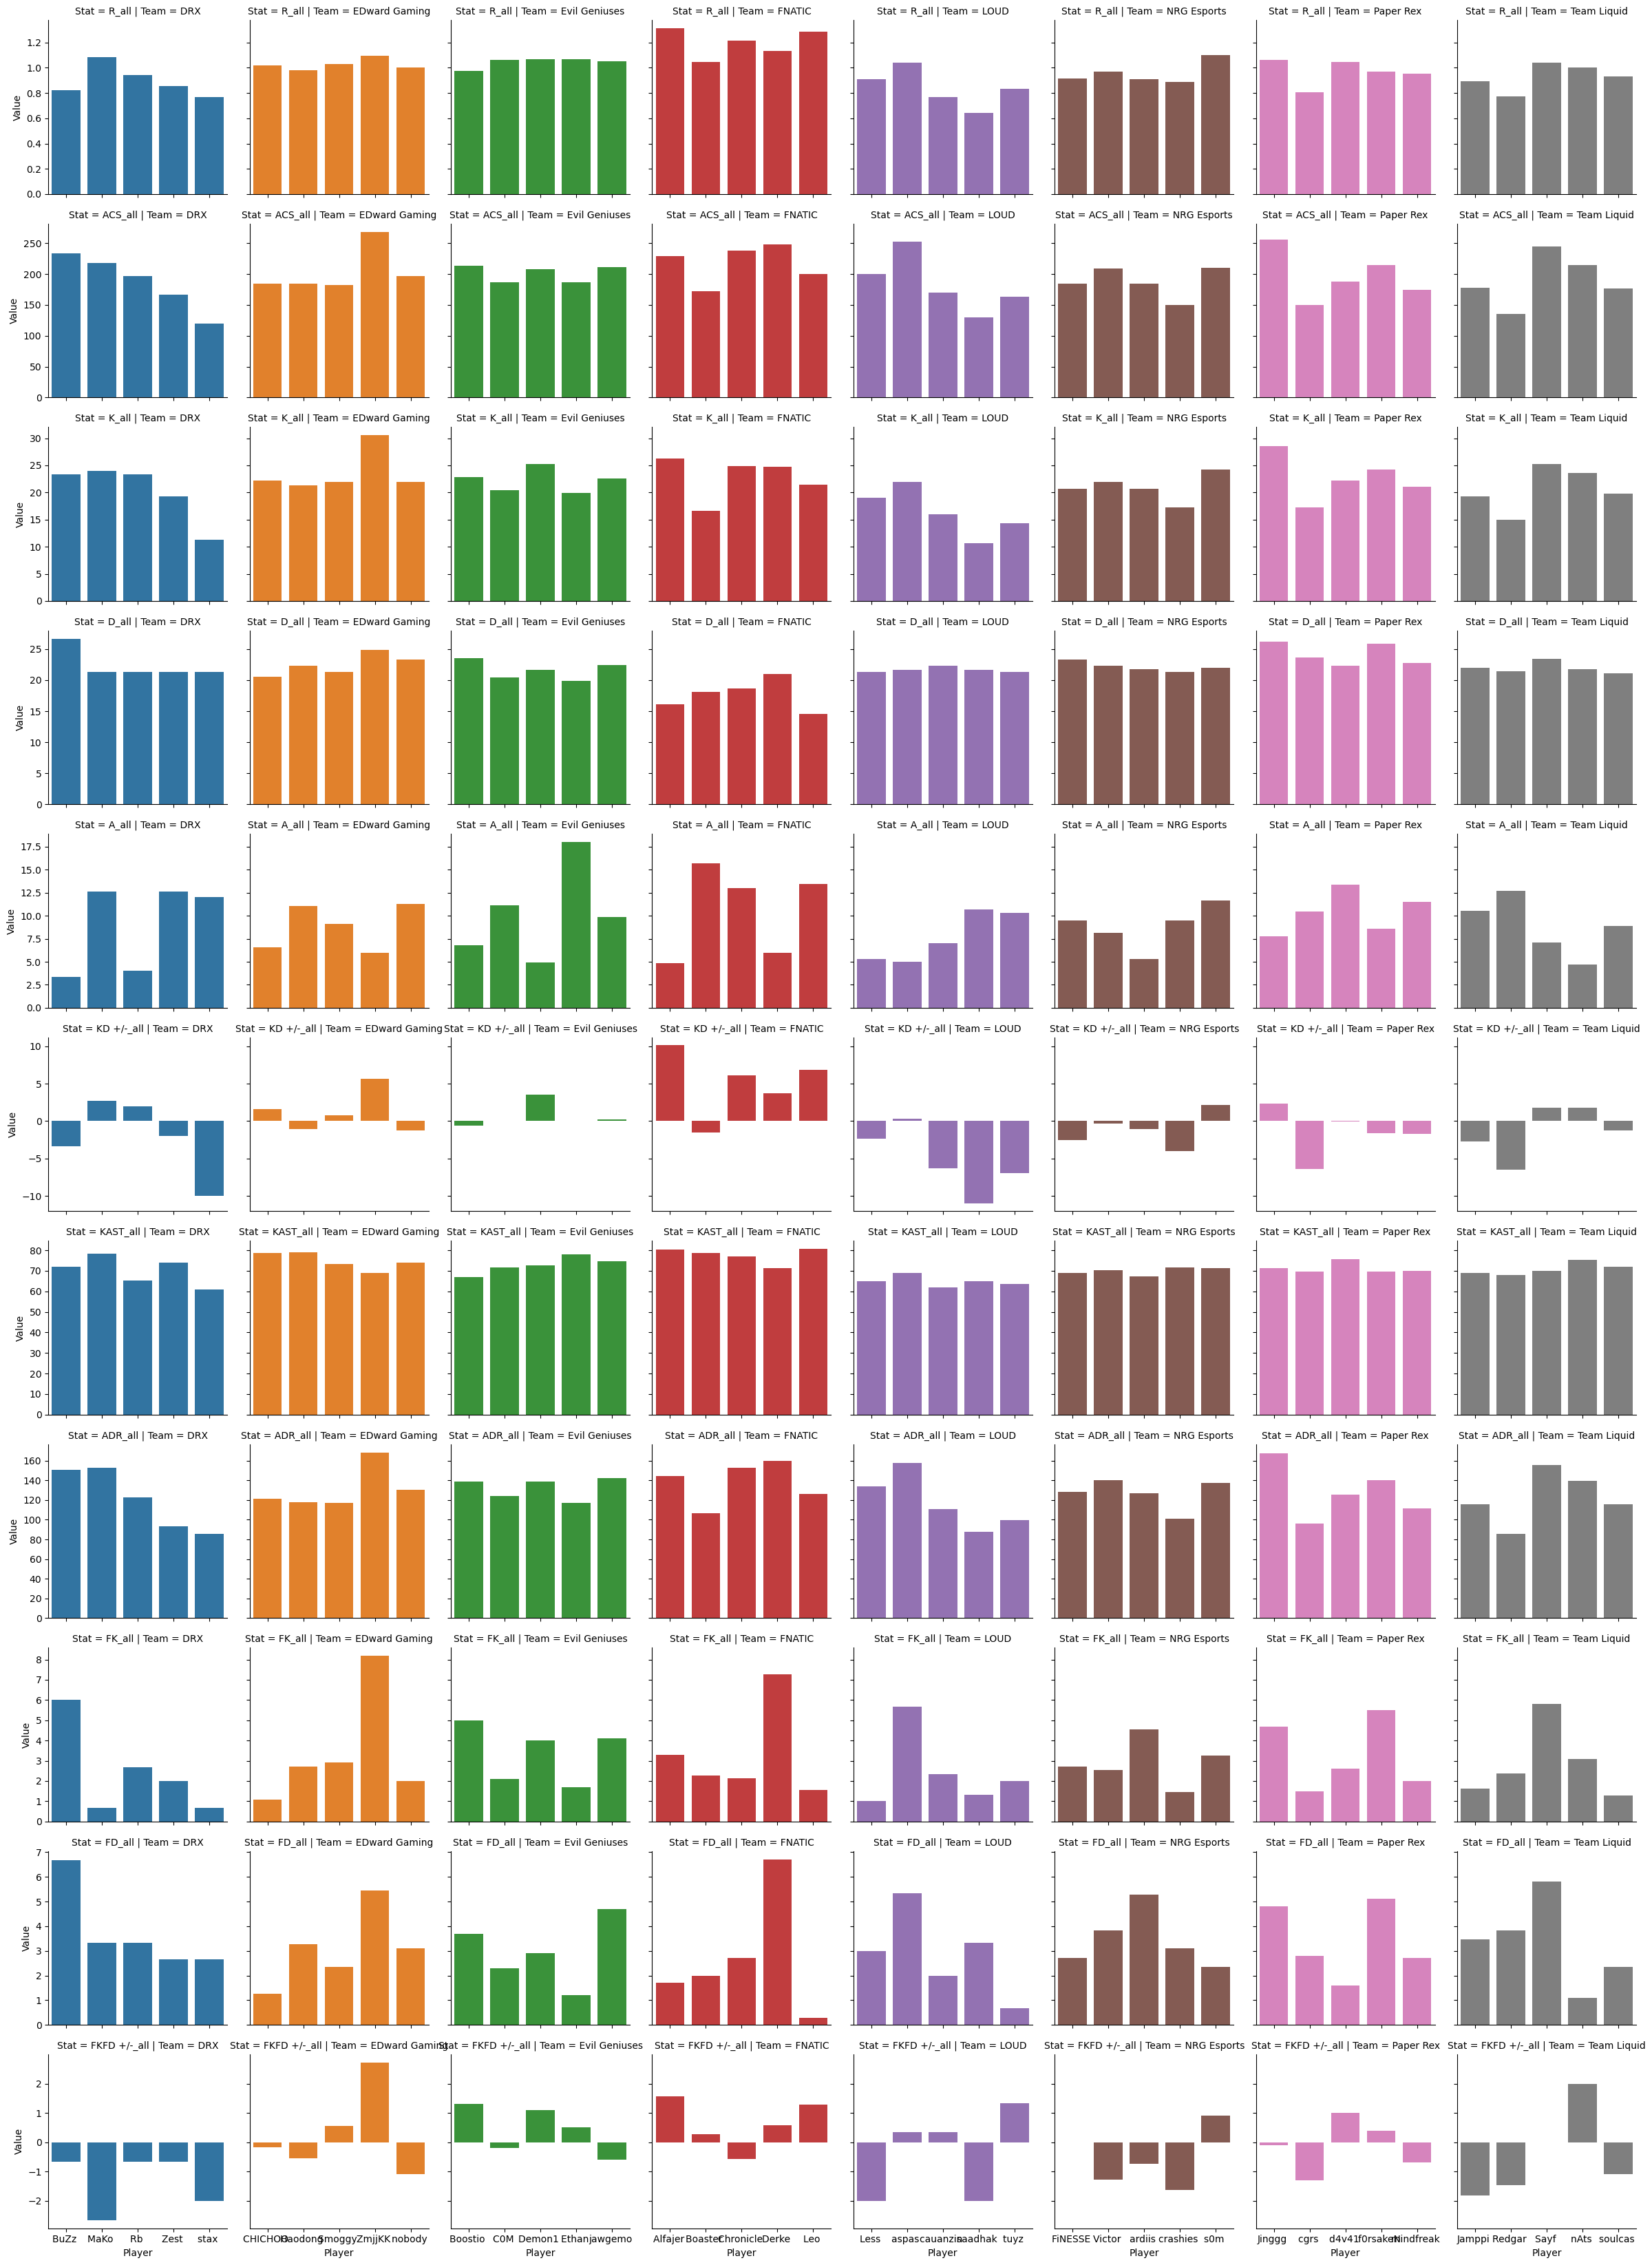

In [15]:
p = sns.FacetGrid(df_player_all, col='Team', row='Stat', hue='Team', sharey='row', sharex='col')
p.map(sns.barplot, 'Player', 'Value', errorbar='sd',)

<Axes: xlabel='ADR_all', ylabel='ACS_all'>

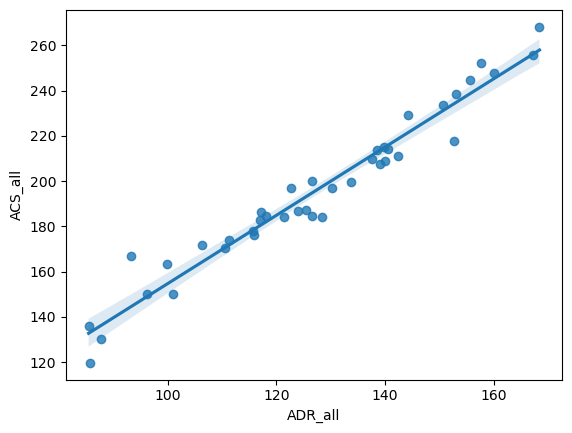

In [16]:
sns.regplot(data=df_player, x='ADR_all', y='ACS_all')

<Axes: xlabel='K_all', ylabel='ACS_all'>

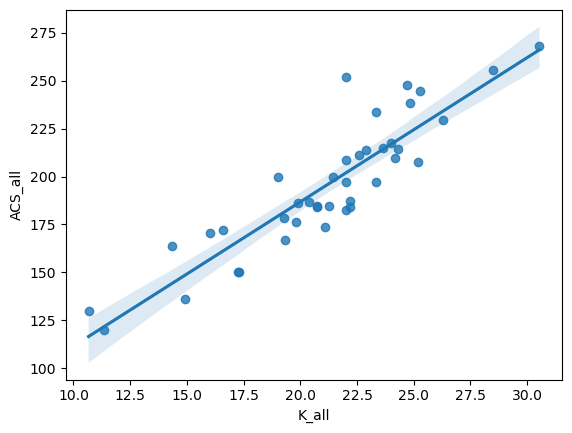

In [17]:
sns.regplot(data=df_player, x='K_all', y='ACS_all')

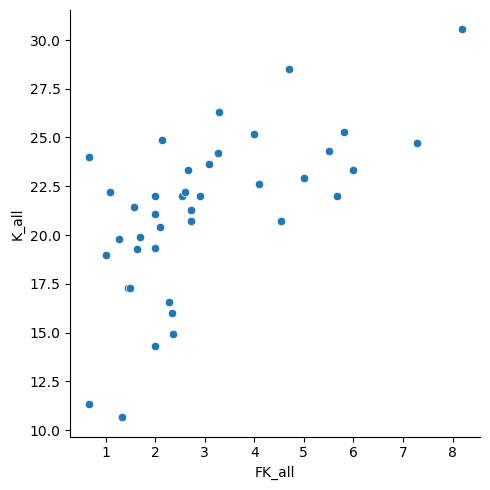

In [18]:
sns.relplot(data=df_player, x='FK_all', y='K_all')

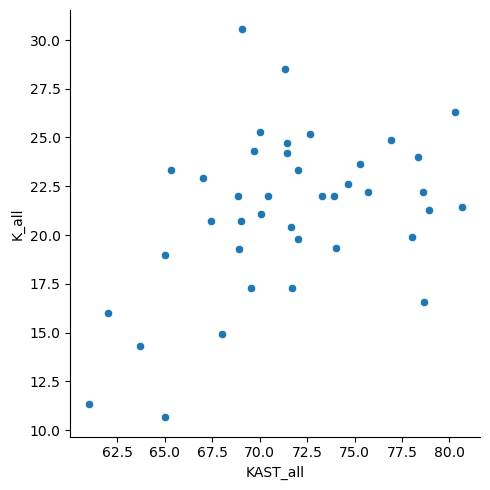

In [19]:
sns.relplot(data=df_player, x='KAST_all', y='K_all')

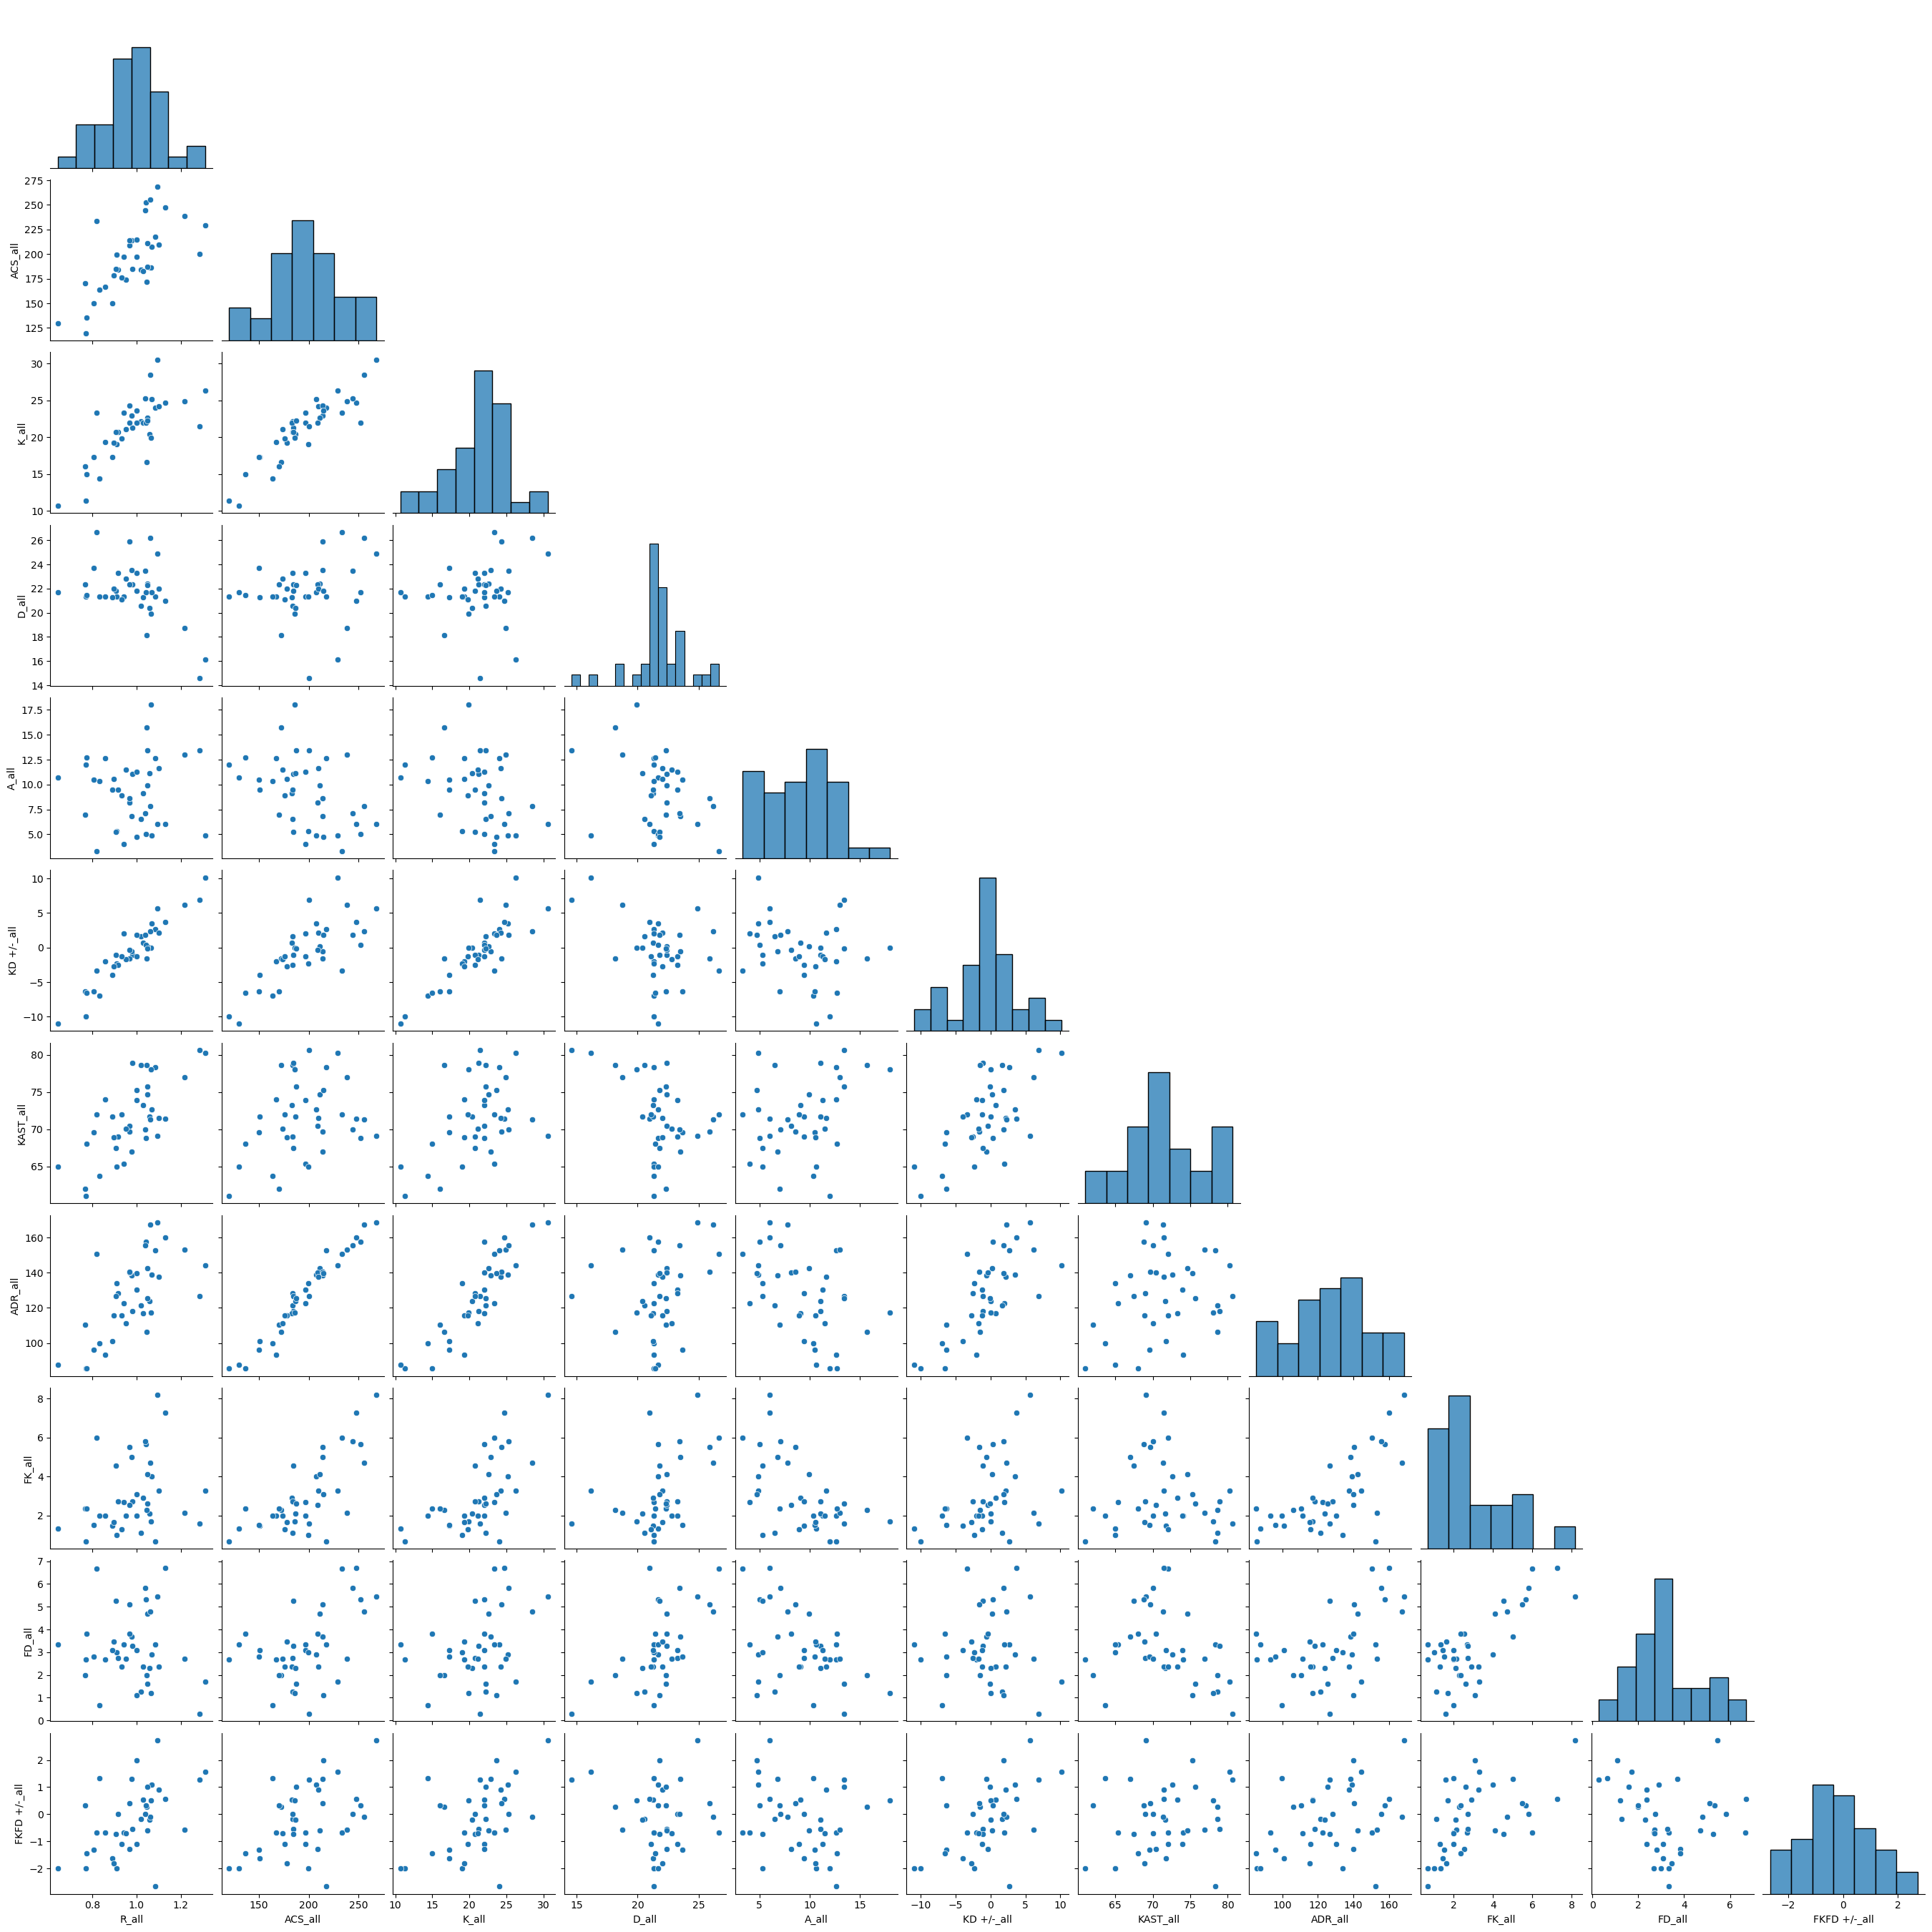

In [20]:
df_player_all = df_player[[col for col in df_player.columns.to_list() if len(col.split('_')) < 2 or col.split('_')[1] == 'all']]
sns.pairplot(data=df_player_all, corner=True)

/tmp/ipykernel_2703/4214741018.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_player_all.corr(), vmin=-1, vmax=1,annot=True)


<Axes: >

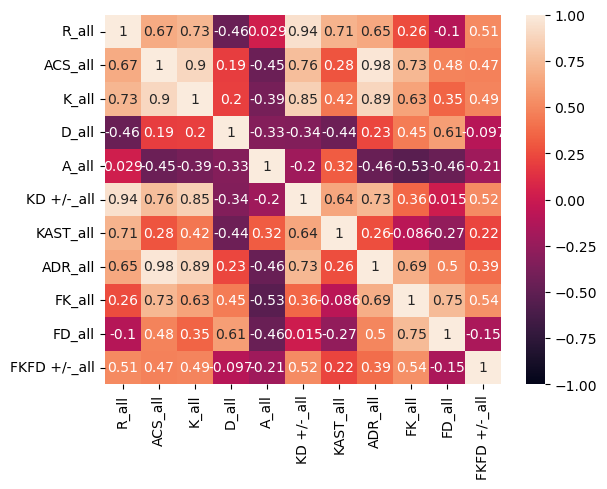

In [21]:
sns.heatmap(data=df_player_all.corr(), vmin=-1, vmax=1,annot=True)

In [23]:
px.scatter_3d(data_frame=df_player, x='FK_all', y='FD_all', z='ADR_all', color='Team')